In [ ]:
import pandas as pd
import matplotlib.pyplot as plt        
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
import warnings  

In [ ]:
phi = np.loadtxt('train.csv', dtype='float', delimiter=',', skiprows=1,
                 usecols=tuple(range(1, 14))) 

In [ ]:
phi

array([[9.55770e-01, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.06380e+02, 1.72800e+01],
       [2.87500e-02, 2.80000e+01, 1.50400e+01, ..., 1.82000e+01,
        3.96330e+02, 6.21000e+00],
       [1.22358e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        3.63430e+02, 4.59000e+00],
       ...,
       [6.65492e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 1.39900e+01],
       [1.31170e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
        3.87690e+02, 1.40900e+01],
       [6.46600e-02, 7.00000e+01, 2.24000e+00, ..., 1.48000e+01,
        3.68240e+02, 4.97000e+00]])

In [ ]:
y = np.loadtxt('train.csv', dtype='float', delimiter=',', skiprows=1,
               usecols=14, ndmin=2)
y

In [ ]:
phi_test = np.loadtxt('test.csv', dtype='float', delimiter=',',
                      skiprows=1, usecols=tuple(range(1, 14)))
phi_test

array([[1.06120e-01, 3.00000e+01, 4.93000e+00, ..., 1.66000e+01,
        3.94620e+02, 1.24000e+01],
       [3.41090e-01, 0.00000e+00, 7.38000e+00, ..., 1.96000e+01,
        3.96900e+02, 6.12000e+00],
       [1.22472e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        2.46500e+01, 1.56900e+01],
       ...,
       [5.36000e-02, 2.10000e+01, 5.64000e+00, ..., 1.68000e+01,
        3.96900e+02, 5.28000e+00],
       [1.04690e-01, 4.00000e+01, 6.41000e+00, ..., 1.76000e+01,
        3.89250e+02, 6.05000e+00],
       [4.55587e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.54700e+02, 7.12000e+00]])

In [ ]:
phi_test = np.concatenate((phi_test, np.ones((105, 1))), axis=1)
phi = np.concatenate((phi, np.ones((400, 1))), axis=1)

In [ ]:
for i in range(0, 13):
    col_max = max(phi[:, i])
    col_min = min(phi[:, i])
    phi[:, i] = (phi[:, i] - col_min) / (col_max - col_min)
    phi_test[:, i] = (phi_test[:, i] - col_min) / (col_max - col_min)

In [ ]:
y = np.log(y)

In [ ]:
def delta_w(p, phi, w):
    if p == 2:
        deltaw = (2 * (np.dot(np.dot(np.transpose(phi), phi), w) -
                       np.dot(np.transpose(phi), y)) +
                  lambd * p * np.power(np.absolute(w), (p - 1)))
    if p < 2 and p > 1:
        deltaw = (2 * (np.dot(np.dot(np.transpose(phi), phi), w) -
                       np.dot(np.transpose(phi), y)) +
                  lambd * p * np.power(np.absolute(w), (p - 1)) * np.sign(w))
    return deltaw

In [ ]:
filenames = {'output.csv': 2.0,
            'output_p1.csv': 1.75,
             'output_p2.csv': 1.5,
             'output_p3.csv': 1.3
             }

In [ ]:
# For each item in this dictionary
for (fname, p) in filenames.items():
    # Set initial w to zeros
    w = np.zeros((14, 1))

    # Hyperparameter lambda value
    lambd = 0.2

    # Maximum step size
    t = 0.00012

    # Calculate new value of w
    w_new = w - t * delta_w(p, phi, w)

    i = 0
    # Repeat steps until error between consecutive w is less than threshold
    while(np.linalg.norm(w_new-w) > 10 ** -10):
        w = w_new
        w_new = w - t * delta_w(p, phi, w)
        i = i + 1

    # Load values of id
    id_test = np.loadtxt('test.csv', dtype='int', delimiter=',',
                         skiprows=1, usecols=0, ndmin=2)

    # Calculate y for test data
    y_test = np.exp(np.dot(phi_test, w_new))

    # Save the ids and y
    np.savetxt(fname, np.concatenate((id_test, y_test), axis=1),
               delimiter=',', fmt=['%d', '%f'], header='ID,MEDV', comments='')

Use Boston Datasen in kaggle

In [ ]:
df = pd.read_csv("Boston.csv")

In [ ]:
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [ ]:
BT = df.copy()

In [ ]:
BT = BT.drop(['Unnamed: 0'], axis = 1)

In [ ]:
BT

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
BT.columns


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [ ]:
BT.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
BT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
BT.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [ ]:
BT.describe().sum()

crim        611.213226
zn          653.186089
indus       585.177132
chas        507.323164
nox         509.537573
rm          544.045752
age         922.223763
dis         535.652903
rad         582.256666
tax        3255.774270
ptratio     617.870479
black      2514.231396
lstat       600.759125
medv        655.954910
dtype: float64

In [ ]:
BT.duplicated().sum()

0

In [ ]:
BT.shape

(506, 14)

In [ ]:
BT[BT.isnull().any(axis=1)]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv


In [ ]:
BT=BT.dropna()

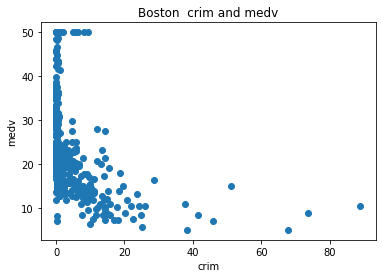

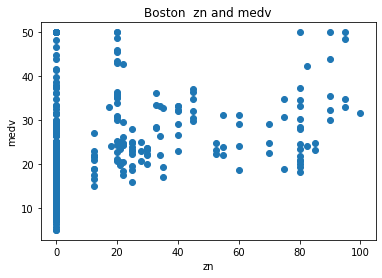

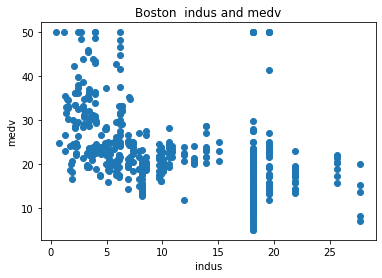

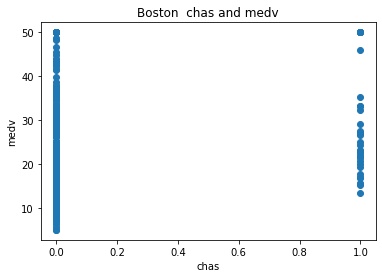

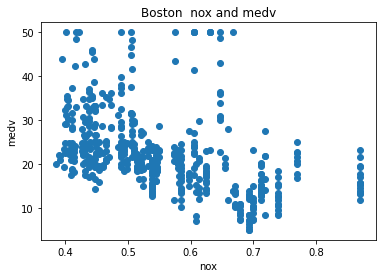

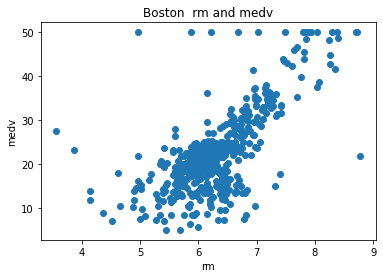

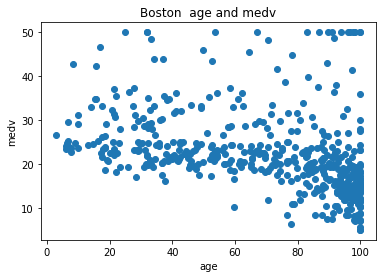

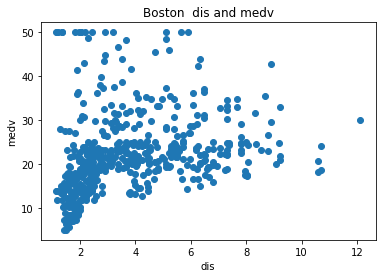

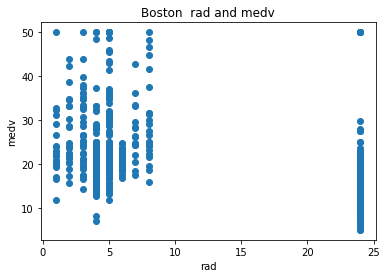

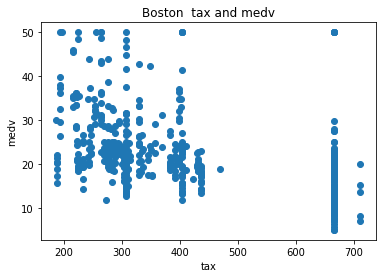

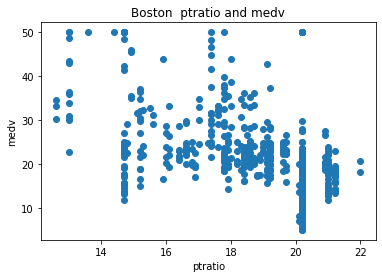

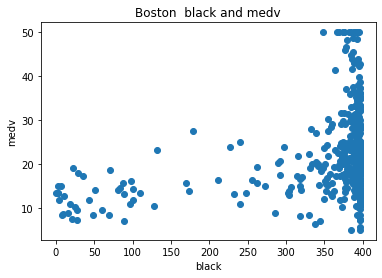

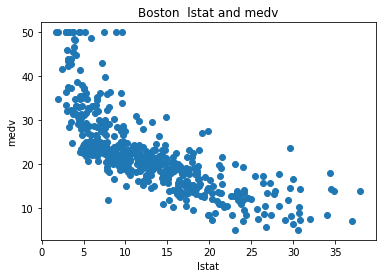

In [ ]:
x_names = BT.columns[0:13]
y_name = BT.columns[-1]
def plot(x,y):
  plt.scatter(BT[x], BT[y])
  plt.xlabel(x)
  plt.ylabel(y)
  plt.title("Boston  "+x+" and "+y)
  plt.show()
for i in x_names:
  plot(i, y_name)